**Reinforcement learning for Trading:**

The training enviromenent used is:
https://github.com/AminHP/gym-anytrading

In [1]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [1]:
!pip install tensorflow==1.15.0
!pip install stable-baselines[mpi]==2.10.2
!pip install gym==0.21.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Gym 
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documen

**1. Bring in Marketwatch Carriage Services Inc. Data**

https://www.marketwatch.com/investing/stock/csv/download-data

In [89]:
df = pd.read_csv('/content/Download Data - STOCK_US_XNYS_CSV (4).csv')

In [90]:
df.head()

,Date,Open,High,Low,Close,Volume
0,08/25/2022,38.91,38.91,38.11,38.38,"46,951"
1,08/24/2022,38.51,39.10,38.13,38.56,"70,144"
2,08/23/2022,38.22,39.15,38.22,38.77,"71,610"
3,08/22/2022,39.64,39.66,37.93,38.27,"105,002"
4,08/19/2022,40.15,40.68,39.69,40.18,"118,481"


In [91]:
#Convert Date to dateTime to work with the gym_anything enviroment
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [92]:
#Set Date column as Index
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-25,38.91,38.91,38.11,38.38,"46,951"
2022-08-24,38.51,39.10,38.13,38.56,"70,144"
2022-08-23,38.22,39.15,38.22,38.77,"71,610"
2022-08-22,39.64,39.66,37.93,38.27,"105,002"
2022-08-19,40.15,40.68,39.69,40.18,"118,481"


In [94]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,235), window_size=5)

In [95]:
#Prices and difference in Prices
env.signal_features

array([[ 3.838e+01,  0.000e+00],
       [ 3.856e+01,  1.800e-01],
       [ 3.877e+01,  2.100e-01],
       [ 3.827e+01, -5.000e-01],
       [ 4.018e+01,  1.910e+00],
       [ 4.041e+01,  2.300e-01],
       [ 4.063e+01,  2.200e-01],
       [ 4.063e+01,  0.000e+00],
       [ 4.103e+01,  4.000e-01],
       [ 3.985e+01, -1.180e+00],
       [ 3.804e+01, -1.810e+00],
       [ 3.852e+01,  4.800e-01],
       [ 3.638e+01, -2.140e+00],
       [ 3.582e+01, -5.600e-01],
       [ 3.668e+01,  8.600e-01],
       [ 3.424e+01, -2.440e+00],
       [ 3.600e+01,  1.760e+00],
       [ 3.866e+01,  2.660e+00],
       [ 3.770e+01, -9.600e-01],
       [ 3.628e+01, -1.420e+00],
       [ 3.684e+01,  5.600e-01],
       [ 4.405e+01,  7.210e+00],
       [ 4.367e+01, -3.800e-01],
       [ 4.291e+01, -7.600e-01],
       [ 4.254e+01, -3.700e-01],
       [ 4.252e+01, -2.000e-02],
       [ 4.125e+01, -1.270e+00],
       [ 4.111e+01, -1.400e-01],
       [ 3.960e+01, -1.510e+00],
       [ 4.039e+01,  7.900e-01],
       [ 3

In [96]:
env.prices

array([38.38, 38.56, 38.77, 38.27, 40.18, 40.41, 40.63, 40.63, 41.03,
       39.85, 38.04, 38.52, 36.38, 35.82, 36.68, 34.24, 36.  , 38.66,
       37.7 , 36.28, 36.84, 44.05, 43.67, 42.91, 42.54, 42.52, 41.25,
       41.11, 39.6 , 40.39, 39.32, 39.08, 39.17, 39.37, 39.98, 39.94,
       39.54, 39.93, 40.23, 39.65, 39.01, 39.34, 39.81, 39.4 , 37.56,
       36.88, 37.74, 35.64, 35.98, 38.38, 37.91, 37.34, 39.57, 40.92,
       41.1 , 41.89, 41.37, 40.64, 41.6 , 40.87, 40.37, 40.42, 40.05,
       39.16, 38.8 , 38.71, 38.33, 38.5 , 38.68, 40.67, 39.52, 39.52,
       39.49, 38.99, 39.29, 40.07, 41.3 , 41.49, 43.34, 41.57, 42.15,
       42.89, 44.87, 48.62, 48.48, 49.73, 49.59, 52.27, 52.99, 53.14,
       52.21, 51.88, 52.  , 51.53, 50.88, 51.62, 51.61, 51.11, 52.62,
       52.33, 52.49, 53.33, 52.85, 52.92, 54.22, 54.86, 54.59, 53.35,
       55.17, 55.25, 56.06, 54.13, 54.65, 53.36, 52.61, 51.16, 51.64,
       50.49, 50.68, 50.66, 51.21, 50.57, 50.81, 49.89, 49.21, 50.34,
       48.98, 49.48,

**2. Build Environment**

In [97]:
env.action_space #it only got sell and buy actions

Discrete(2)

In [102]:
state = env.reset()#initial state
while True: 
    action = env.action_space.sample()#random action
    n_state, reward, done, info = env.step(action)#apply action to environment
    if done: 
        print("info", info) #total_profit>1 means we made profit
        break

info {'total_reward': 4.789999999999992, 'total_profit': 0.47874618970444616, 'position': 0}


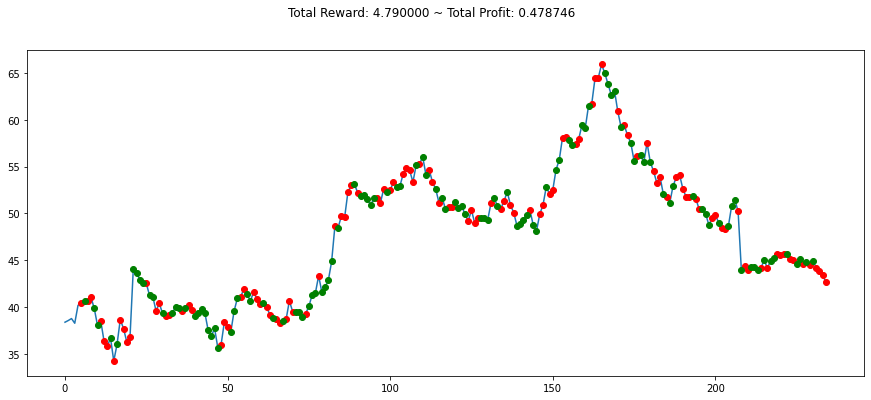

In [103]:
#plot 
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()# red = bad trade, green=good trade
plt.show()

**3. Build Environment and Train**

In [104]:
env_maker =lambda: gym.make('stocks-v0', df=df, frame_bound=(5,235), window_size=5)
#Wrap the environment inside DummyVecEnv 
env = DummyVecEnv([env_maker])

In [139]:
from stable_baselines.common.callbacks import EvalCallback

# Use deterministic actions for evaluation
eval_callback = EvalCallback(env, best_model_save_path='./logs/',
                             log_path='./logs/', eval_freq=500,
                             deterministic=True, render=False)

In [145]:
#Create the RL model

model = A2C('MlpLstmPolicy', env, verbose=1) #Using LSTM to keep context
model.learn(total_timesteps=100000,callback=[eval_callback])
#explained variable : the closer to 1 the better

Wrapping the env in a DummyVecEnv.
---------------------------------
| explained_variance | -0.0517  |
| fps                | 17       |
| nupdates           | 1        |
| policy_entropy     | 0.688    |
| total_timesteps    | 5        |
| value_loss         | 0.734    |
---------------------------------
Eval num_timesteps=231, episode_reward=0.00 +/- 0.00
Episode length: 29.00 +/- 0.00
---------------------------------
| explained_variance | -0.0669  |
| fps                | 266      |
| nupdates           | 100      |
| policy_entropy     | 0.686    |
| total_timesteps    | 500      |
| value_loss         | 0.0189   |
---------------------------------
Eval num_timesteps=731, episode_reward=0.00 +/- 0.00
Episode length: 29.00 +/- 0.00
---------------------------------
| explained_variance | 0.0424   |
| fps                | 293      |
| nupdates           | 200      |
| policy_entropy     | 0.684    |
| total_timesteps    | 1000     |
| value_loss         | 2.68e-05 |
---------------

**4. Evaluation**

In [143]:
#Load saved model
model = A2C.load("/content/logs/best_model.zip")

Loading a model without an environment, this model cannot be trained until it has a valid environment.


In [146]:
env = gym.make('stocks-v0', df=df, frame_bound=(215,235), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)#Using the trained model to predict next action
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 0.7900000000000063, 'total_profit': 1.019549851639336, 'position': 1}


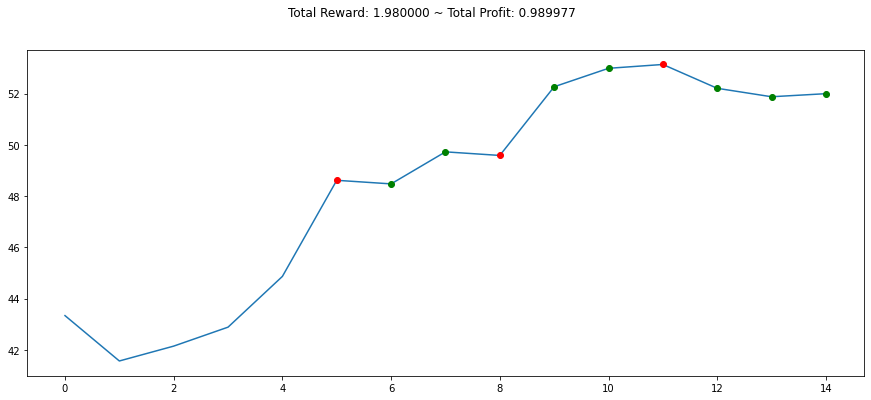

In [61]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()